In [1]:
from sklearn import metrics

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms=MinMaxScaler()
sc=StandardScaler()

from sklearn.model_selection import GridSearchCV

import scikitplot as skplt

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import scikitplot as skplt
from sklearn.ensemble import AdaBoostClassifier

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [5]:
bank=pd.read_csv('bank-full.csv',delimiter=';')  

In [6]:
bank.shape

(45211, 17)

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
main_df=bank.copy(deep=True)

###### Reducing Skewness of the age

###### Reducing skewness of the balance

In [9]:
main_df['balance'].skew()

8.360308326166326

In [10]:
np.cbrt(main_df['balance']).skew()

-0.07818749236478738

In [11]:
main_df['balance']=np.cbrt(main_df['balance'])

###### Reducing skewness of the duration

In [12]:
main_df['duration'].skew()

3.144318099423456

In [13]:
np.cbrt(main_df['duration']).skew()

0.64014649967056

In [14]:
main_df[main_df['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,7.054004,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,17.689106,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,5.451362,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [15]:
main_df['duration']=np.cbrt(main_df['duration'])

In [16]:
main_df['y']=main_df['y'].replace(['no','yes'],[0, 1])

In [17]:
#convert categorical to encoded type and concat with numerical

In [18]:
#Due to high Correlation dropping Duration
main_df.drop('duration',axis=1,inplace=True)

In [19]:
cat_cols = main_df.select_dtypes(include=[
        'object']).columns
df = pd.get_dummies(main_df, columns=cat_cols,drop_first=True)

#standard Scaler for Numerical Variables
scaler = StandardScaler()
num_cols = main_df.select_dtypes(include=np.number).columns
num_cols = num_cols.drop('y')
df[num_cols] = scaler.fit_transform(df[num_cols])

In [20]:
X = df.drop(columns=['y'])


y =main_df['y']
print(X.shape)
print(y.shape)

y.value_counts().to_frame()

(45211, 41)
(45211,)


,y
0,39922
1,5289


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 110)

In [98]:
def algorithm(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train,y_train)
    
    y_test_model_predict=model.predict(X_test)
    
    print('CLASSIFICATION REFORT')
    print(classification_report(y_test, y_test_model_predict))
    
    print('CONFUSION MATRIX')
    skplt.metrics.plot_confusion_matrix(y_test,y_test_model_predict)


    model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    print('Accuracy Score',metrics.accuracy_score(y_test,y_test_model_predict))
    print('Roc Auc Score ',model_roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return(fpr,tpr)

#### Logistic Regression model

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.68      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043

CONFUSION MATRIX
Accuracy Score 0.8906336392790003
Roc Auc Score  0.7599210063312967


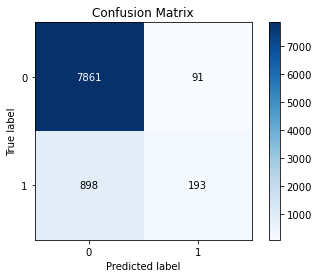

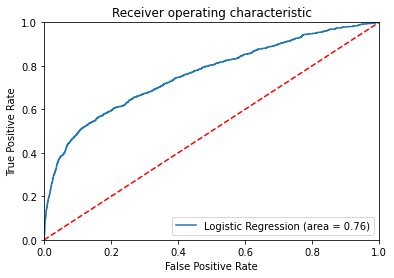

In [99]:
logreg = LogisticRegression()
fpr_logr,tpr_logr=algorithm(logreg,X,y)

#### Knn

In [24]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.21      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.62      9043
weighted avg       0.86      0.89      0.86      9043



0.7442904447768185


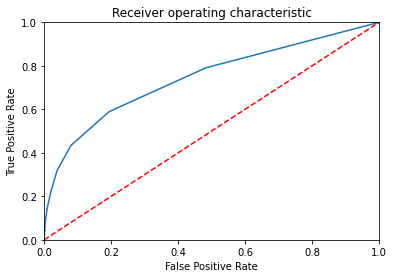

In [101]:
knn_proba=knn.predict_proba(X_test)
print(metrics.roc_auc_score(y_test,knn_proba[:,-1]))
fpr_Knn,tpr_Knn, thresholds = roc_curve(y_test,knn_proba[:,1])

plt.figure()
plt.plot(fpr_Knn,tpr_Knn,marker=',')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

### NB

In [92]:
from sklearn.naive_bayes import GaussianNB

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7952
           1       0.39      0.42      0.40      1091

    accuracy                           0.85      9043
   macro avg       0.66      0.66      0.66      9043
weighted avg       0.86      0.85      0.85      9043

CONFUSION MATRIX
Accuracy Score 0.8520402521287184
Roc Auc Score  0.7357153922619124


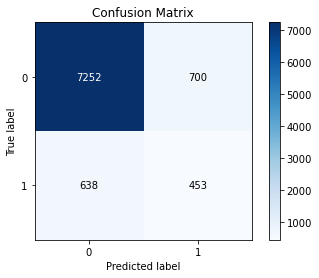

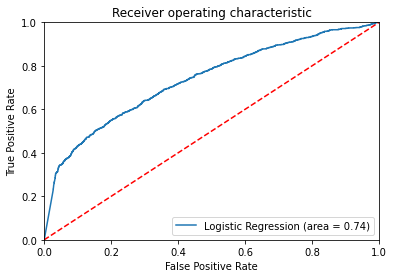

In [102]:
NB=GaussianNB()
fpr_NB,tpr_NB=algorithm(NB,X,y)

#### Decision Tree

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7952
           1       0.33      0.34      0.33      1091

    accuracy                           0.84      9043
   macro avg       0.62      0.62      0.62      9043
weighted avg       0.84      0.84      0.84      9043

CONFUSION MATRIX
Accuracy Score 0.8357845847616941
Roc Auc Score  0.6223218089471753


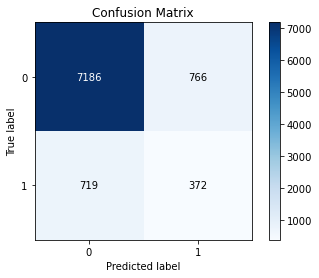

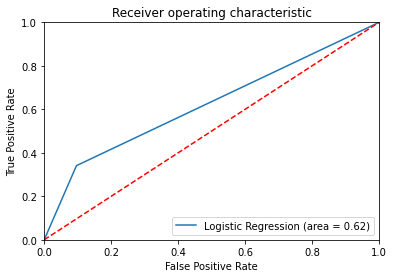

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
fpr_Dt,tpr_Dt=algorithm(dt,X,y)

#### Random Forest Classifier

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.66      0.23      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043

CONFUSION MATRIX
Roc Auc Score  0.7743563235508376


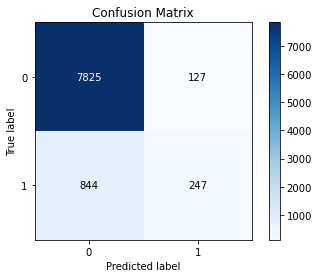

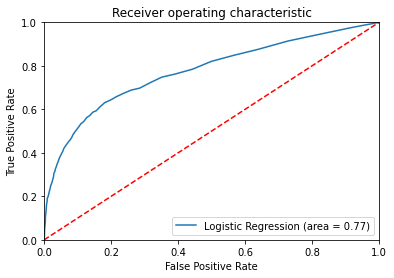

In [52]:
rf=RandomForestClassifier()
fpr_RF,tpr_RF=algorithm(rf,X,y)

#### Adaboost

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.63      0.20      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043

CONFUSION MATRIX
Accuracy Score 0.8891960632533451
Roc Auc Score  0.7723337043341626


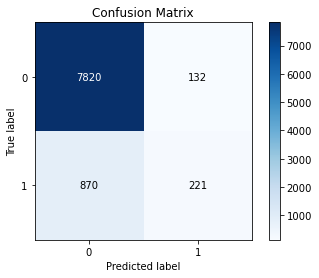

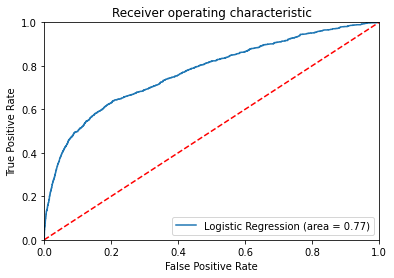

In [104]:
ada=AdaBoostClassifier()
fpr_Ada,tpr_Ada=algorithm(ada,X,y)

#### XGBoost Classifier

[22:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.62      0.24      0.35      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043

CONFUSION MATRIX
Accuracy Score 0.8909653875926131
Roc Auc Score  0.7917092956455507


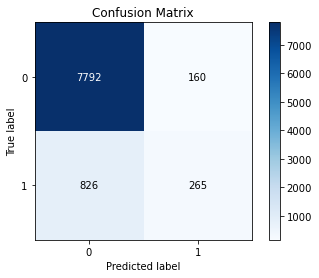

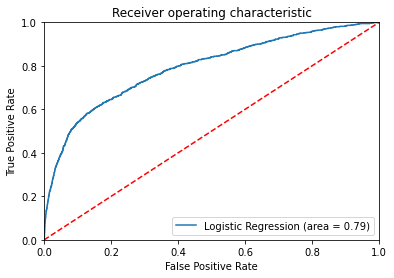

In [105]:
xgb = XGBClassifier(use_label_encoder=False)
fpr_Xgb,tpr_Xgb=algorithm(xgb,X,y)

#### Collective Roc Representation

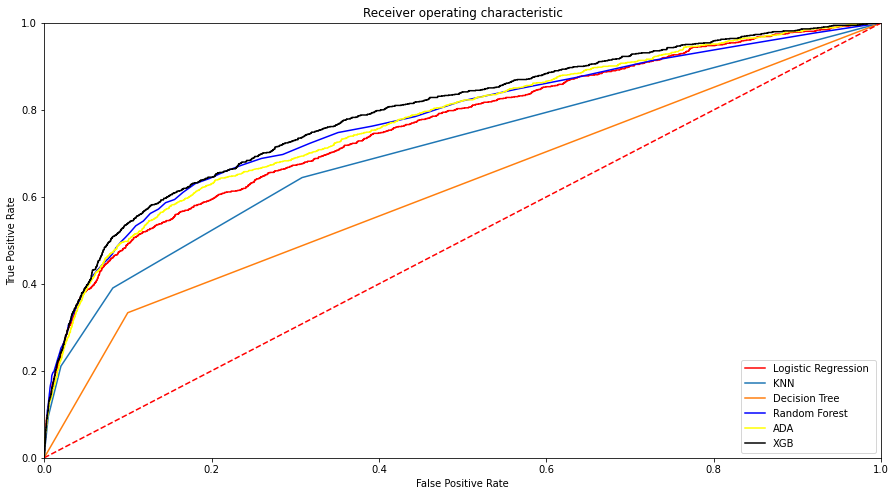

In [72]:
plt.figure(figsize=(15,8))
plt.plot(fpr_logr, tpr_logr, label='Logistic Regression ',color='red' )
plt.plot(fpr_Knn, tpr_Knn, label='KNN' )
plt.plot(fpr_Dt, tpr_Dt, label='Decision Tree' )
plt.plot(fpr_RF, tpr_RF, label='Random Forest',color='blue' )
plt.plot(fpr_Ada, tpr_Ada, label='ADA' ,color='yellow')
plt.plot(fpr_Xgb, tpr_Xgb, label='XGB',color='black' )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### CROSS VALIDATION

#### Logistic Regression

In [32]:
logreg = LogisticRegression()
cs_logr=cross_val_score(logreg,X_train,y_train,cv=5)
cvp_logr=cross_val_predict(logreg,X_train,y_train,cv=5)
print('scores',cs_logr)
print('\nMean Cross val scores',cs_logr.mean())
print('\nClassification report')
print(classification_report(y_train, cvp_logr))

logr_roc_auc = roc_auc_score(y_train, cvp_logr)
print('\nROC Score',logr_roc_auc)

scores [0.89079348 0.89646116 0.89259054 0.89119314 0.89160791]

Mean Cross val scores 0.8925292452599043

Classification report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31970
           1       0.63      0.18      0.27      4198

    accuracy                           0.89     36168
   macro avg       0.77      0.58      0.61     36168
weighted avg       0.87      0.89      0.86     36168


ROC Score 0.5809104697516714


#### Knn

In [33]:
kneigh = KNeighborsClassifier()
cs_knn=cross_val_score(kneigh,X_train,y_train,cv=5)
print('scores',cs_knn)
print('\nMean Cross val scores',cs_knn.mean())

scores [0.88263754 0.88968759 0.88664639 0.88469515 0.88428038]

Mean Cross val scores 0.8855894104376232


In [34]:
print('\nClassification report')
print(classification_report(y_train,cross_val_predict(kneigh,X_train,y_train,cv=5)))



Classification report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.52      0.19      0.28      4198

    accuracy                           0.89     36168
   macro avg       0.71      0.58      0.61     36168
weighted avg       0.86      0.89      0.86     36168



#### Decision Tree Classifier

CrossValidation Scores= [0.89231407 0.89563174 0.8935582  0.89050187 0.89243744]
Mean CrossValidation Scores 0.8928886629611823
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     31970
           1       0.29      0.32      0.31      4198

    accuracy                           0.83     36168
   macro avg       0.60      0.61      0.61     36168
weighted avg       0.84      0.83      0.83     36168

0.6107054568040577


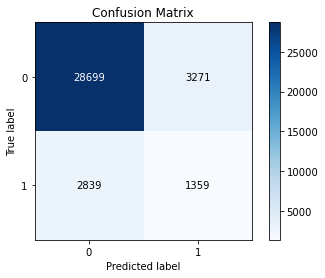

In [35]:
dt=DecisionTreeClassifier()
cs_dt=cross_val_score(rf,X_train,y_train,cv=5)

print('CrossValidation Scores=',cs_dt)
print('Mean CrossValidation Scores',cs_dt.mean())
cvp=cross_val_predict(dt,X_train,y_train,cv=5)
print(classification_report(y_train, cvp))

rf_roc_auc = roc_auc_score(y_train, cvp)
print(rf_roc_auc)

skplt.metrics.plot_confusion_matrix(y_train,cvp)

#### Random Forest Classifier

CrossValidation Scores= [0.89148466 0.89618468 0.89424938 0.89064012 0.89312872]
Mean CrossValidation Scores 0.8931375108885063
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     31970
           1       0.62      0.22      0.32      4198

    accuracy                           0.89     36168
   macro avg       0.76      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168

0.6007804854569023


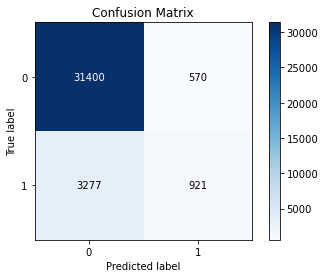

In [36]:
rf=RandomForestClassifier()
cs_rf=cross_val_score(rf,X_train,y_train,cv=5)

print('CrossValidation Scores=',cs_rf)
print('Mean CrossValidation Scores',cs_rf.mean())
cvp=cross_val_predict(rf,X_train,y_train,cv=5)
print(classification_report(y_train, cvp))

rf_roc_auc = roc_auc_score(y_train, cvp)
print(rf_roc_auc)

skplt.metrics.plot_confusion_matrix(y_train,cvp)

### NB

CrossValidation Scores= [0.85139618 0.85706387 0.85291678 0.8502696  0.86008572]
Mean CrossValidation Scores 0.8543464295083194
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     31970
           1       0.38      0.42      0.40      4198

    accuracy                           0.85     36168
   macro avg       0.65      0.67      0.66     36168
weighted avg       0.86      0.85      0.86     36168

0.6652599216481984


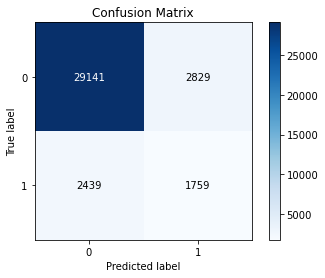

In [96]:
NB=GaussianNB()
cs_NB=cross_val_score(NB,X_train,y_train,cv=5)

print('CrossValidation Scores=',cs_NB)
print('Mean CrossValidation Scores',cs_NB.mean())
cvp=cross_val_predict(NB,X_train,y_train,cv=5)
print(classification_report(y_train, cvp))

NB_roc_auc = roc_auc_score(y_train, cvp)
print(NB_roc_auc)

skplt.metrics.plot_confusion_matrix(y_train,cvp)

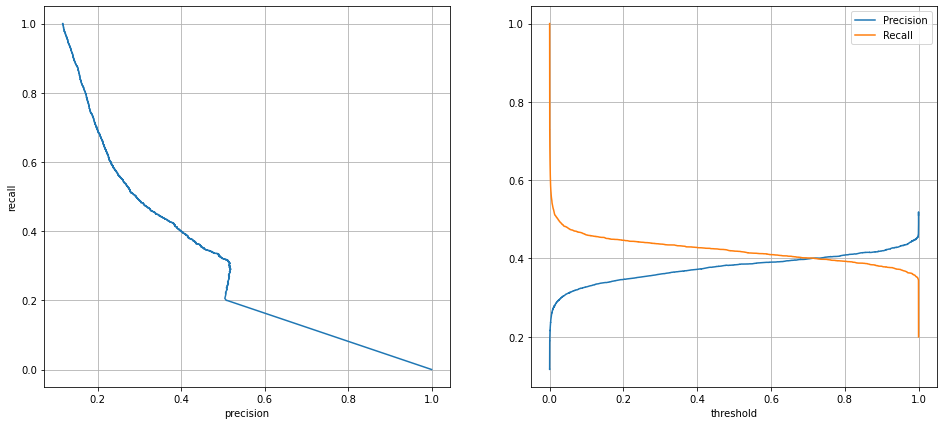

In [107]:
cvp_predict=cross_val_predict(NB,X_train,y_train,cv=5,method='predict_proba')

nb_precision,nb_recall,nb_thresh=metrics.precision_recall_curve(y_train,cvp_predict[:,-1])

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(nb_precision,nb_recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid()

plt.subplot(1,2,2)
plt.plot(nb_thresh,nb_precision[:-1],label='Precision')
plt.plot(nb_thresh,nb_recall[:-1],label='Recall')
plt.xlabel('threshold')
plt.legend()
plt.grid()

#### Ada bosst

In [59]:
ab=AdaBoostClassifier()

cvp_ab=cross_val_predict(ab,X_train,y_train,cv=5)

In [60]:
print('CrossValidation Scores=',cvp_ab)

CrossValidation Scores= [0 0 0 ... 0 0 0]


In [61]:
print('Mean CrossValidation Scores',cvp_ab.mean())

Mean CrossValidation Scores 0.03702167662021676


In [ ]:
print(classification_report(y_train, cvp_ab))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.61      0.19      0.30      4198

    accuracy                           0.89     36168
   macro avg       0.76      0.59      0.62     36168
weighted avg       0.87      0.89      0.87     36168

0.7790282636040845


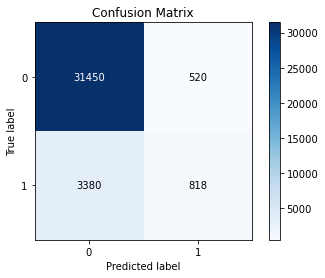

In [58]:
cvp_ab2=cross_val_predict(ab,X_train,y_train,cv=5,method='predict_proba')

ab_roc_auc = roc_auc_score(y_train, cvp_ab2[:,-1])
print(ab_roc_auc)

skplt.metrics.plot_confusion_matrix(y_train,cvp_ab)

In [ ]:
algo.append('ADAboost Classifier')
cvs_score.append(cvp_ab.mean())

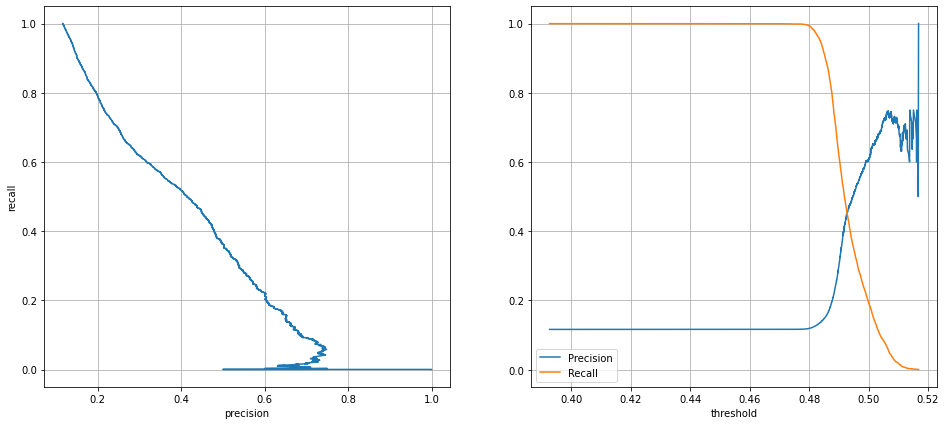

In [110]:
ada_precision,ada_recall,ada_thresh=metrics.precision_recall_curve(y_train,cvp_ab2[:,-1])

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(ada_precision,ada_recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid()

plt.subplot(1,2,2)
plt.plot(ada_thresh,ada_precision[:-1],label='Precision')
plt.plot(ada_thresh,ada_recall[:-1],label='Recall')
plt.xlabel('threshold')
plt.legend()
plt.grid()

#### XGBOOST Classifier

In [ ]:
xgb = XGBClassifier(use_label_encoder=False)
cs=cross_val_score(xgb,X_train,y_train,cv=10)

In [32]:
from sklearn.model_selection import cross_val_predict
cvp_predict=cross_val_predict(xgb,X_train,y_train,cv=10)
cvp=cross_val_predict(xgb,X_train,y_train,cv=10,method='predict_proba')

[11:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Crossval Scores [0.890517   0.89217584 0.88941111 0.89383467 0.88968759 0.89189936
 0.8954935  0.88332873 0.88855088 0.89021018]
Mean Crossval Scores 0.8905108863992796
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     31881
           1       0.59      0.26      0.36      4287

    accuracy                           0.89     36168
   macro avg       0.75      0.62      0.65     36168
weighted avg       0.87      0.89      0.87     36168

0.790513089164747


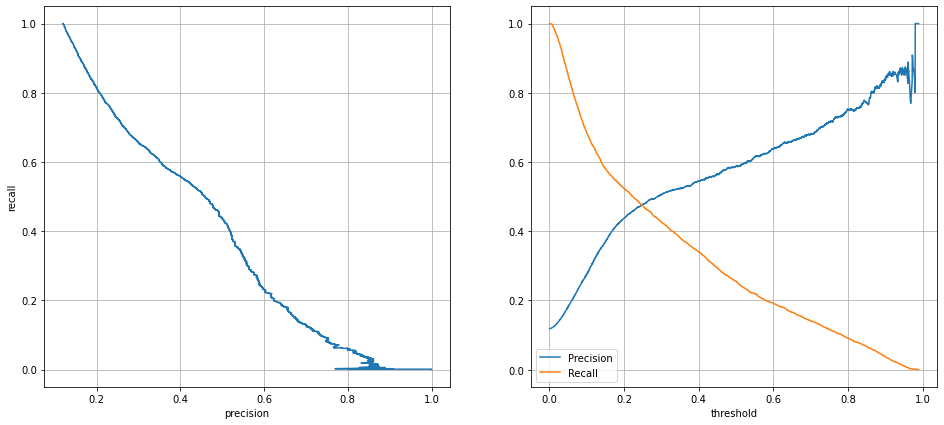

In [33]:
print('Crossval Scores',cs)
print('Mean Crossval Scores',cs.mean())
print(classification_report(y_train, cvp_predict))

logit_roc_auc = roc_auc_score(y_train, cvp[:,1])
print(logit_roc_auc)

metrics.confusion_matrix(y_train,cvp_predict)
xgb_precision,xgb_recall,xgb_thresh=metrics.precision_recall_curve(y_train,cvp[:,-1])

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(xgb_precision,xgb_recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid()

plt.subplot(1,2,2)
plt.plot(xgb_thresh,xgb_precision[:-1],label='Precision')
plt.plot(xgb_thresh,xgb_recall[:-1],label='Recall')
plt.xlabel('threshold')
plt.legend()
plt.grid()

#### HyperParameter Tuning 

In [38]:
from sklearn import tree

### KNN

In [142]:
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[30,50,60,15,10,80],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(model, param_distributions=params, n_jobs=1,cv=3,verbose=3)
#Learning
model1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=10, weights=distance; total time=  11.9s
[CV 2/3] END algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=10, weights=distance; total time=  10.7s
[CV 3/3] END algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=10, weights=distance; total time=  11.9s
[CV 1/3] END algorithm=kd_tree, leaf_size=80, n_jobs=-1, n_neighbors=5, weights=uniform; total time=   8.4s
[CV 2/3] END algorithm=kd_tree, leaf_size=80, n_jobs=-1, n_neighbors=5, weights=uniform; total time=   7.7s
[CV 3/3] END algorithm=kd_tree, leaf_size=80, n_jobs=-1, n_neighbors=5, weights=uniform; total time=   8.0s
[CV 1/3] END algorithm=auto, leaf_size=30, n_jobs=-1, n_neighbors=10, weights=uniform; total time=  15.6s
[CV 2/3] END algorithm=auto, leaf_size=30, n_jobs=-1, n_neighbors=10, weights=uniform; total time=  20.8s
[CV 3/3] END algorithm=auto, leaf_size=30, n_jobs=-1, n_neighbors=10, wei

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30, 50, 60, 15, 10, 80],
                                        'n_jobs': [-1],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [143]:
model1.best_params_

{'weights': 'uniform',
 'n_neighbors': 10,
 'n_jobs': -1,
 'leaf_size': 30,
 'algorithm': 'auto'}

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(weights='uniform',n_neighbors=10,n_jobs=-1,leaf_size=30,algorithm='auto')
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7952
           1       0.71      0.14      0.23      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.57      0.59      9043
weighted avg       0.87      0.89      0.85      9043



In [89]:
fpr_Knn,tpr_Knn,th=metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,-1])

## DECISION TREE

In [97]:
DT=DecisionTreeClassifier(random_state=42)


params={'criterion':['gini','entropy'],
    'max_depth':[7,14,21,28,35,45,50],
       'max_leaf_nodes':[7,14,21,28,35,45,55],
       'min_samples_split':[2,4,6,8,],
       'max_features':['auto','sqrt','log2']}
grid_dt=GridSearchCV(estimator=DT,param_grid=params,cv=5,verbose=3,n_jobs=4)
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 14, 21, 28, 35, 45, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [7, 14, 21, 28, 35, 45, 55],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=3)

In [98]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'max_features': 'log2',
 'max_leaf_nodes': 45,
 'min_samples_split': 4}

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.69      0.19      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043

Roc Auc Score 0.7450790904916207


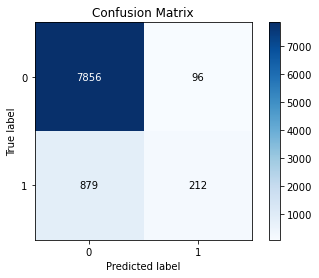

In [81]:
dt=DecisionTreeClassifier(
                          criterion='gini',min_samples_split=4,max_depth=21,max_leaf_nodes=45)
dt.fit(X_train,y_train)

print(classification_report(y_test, dt.predict(X_test)))

rf_roc_auc = metrics.roc_auc_score(y_test, dt.predict_proba(X_test)[:,-1])
print('Roc Auc Score',rf_roc_auc)

skplt.metrics.plot_confusion_matrix(y_test,dt.predict(X_test))

In [82]:
fpr_dt,tpr_dt,th=metrics.roc_curve(y_test, dt.predict_proba(X_test)[:,-1])

[]

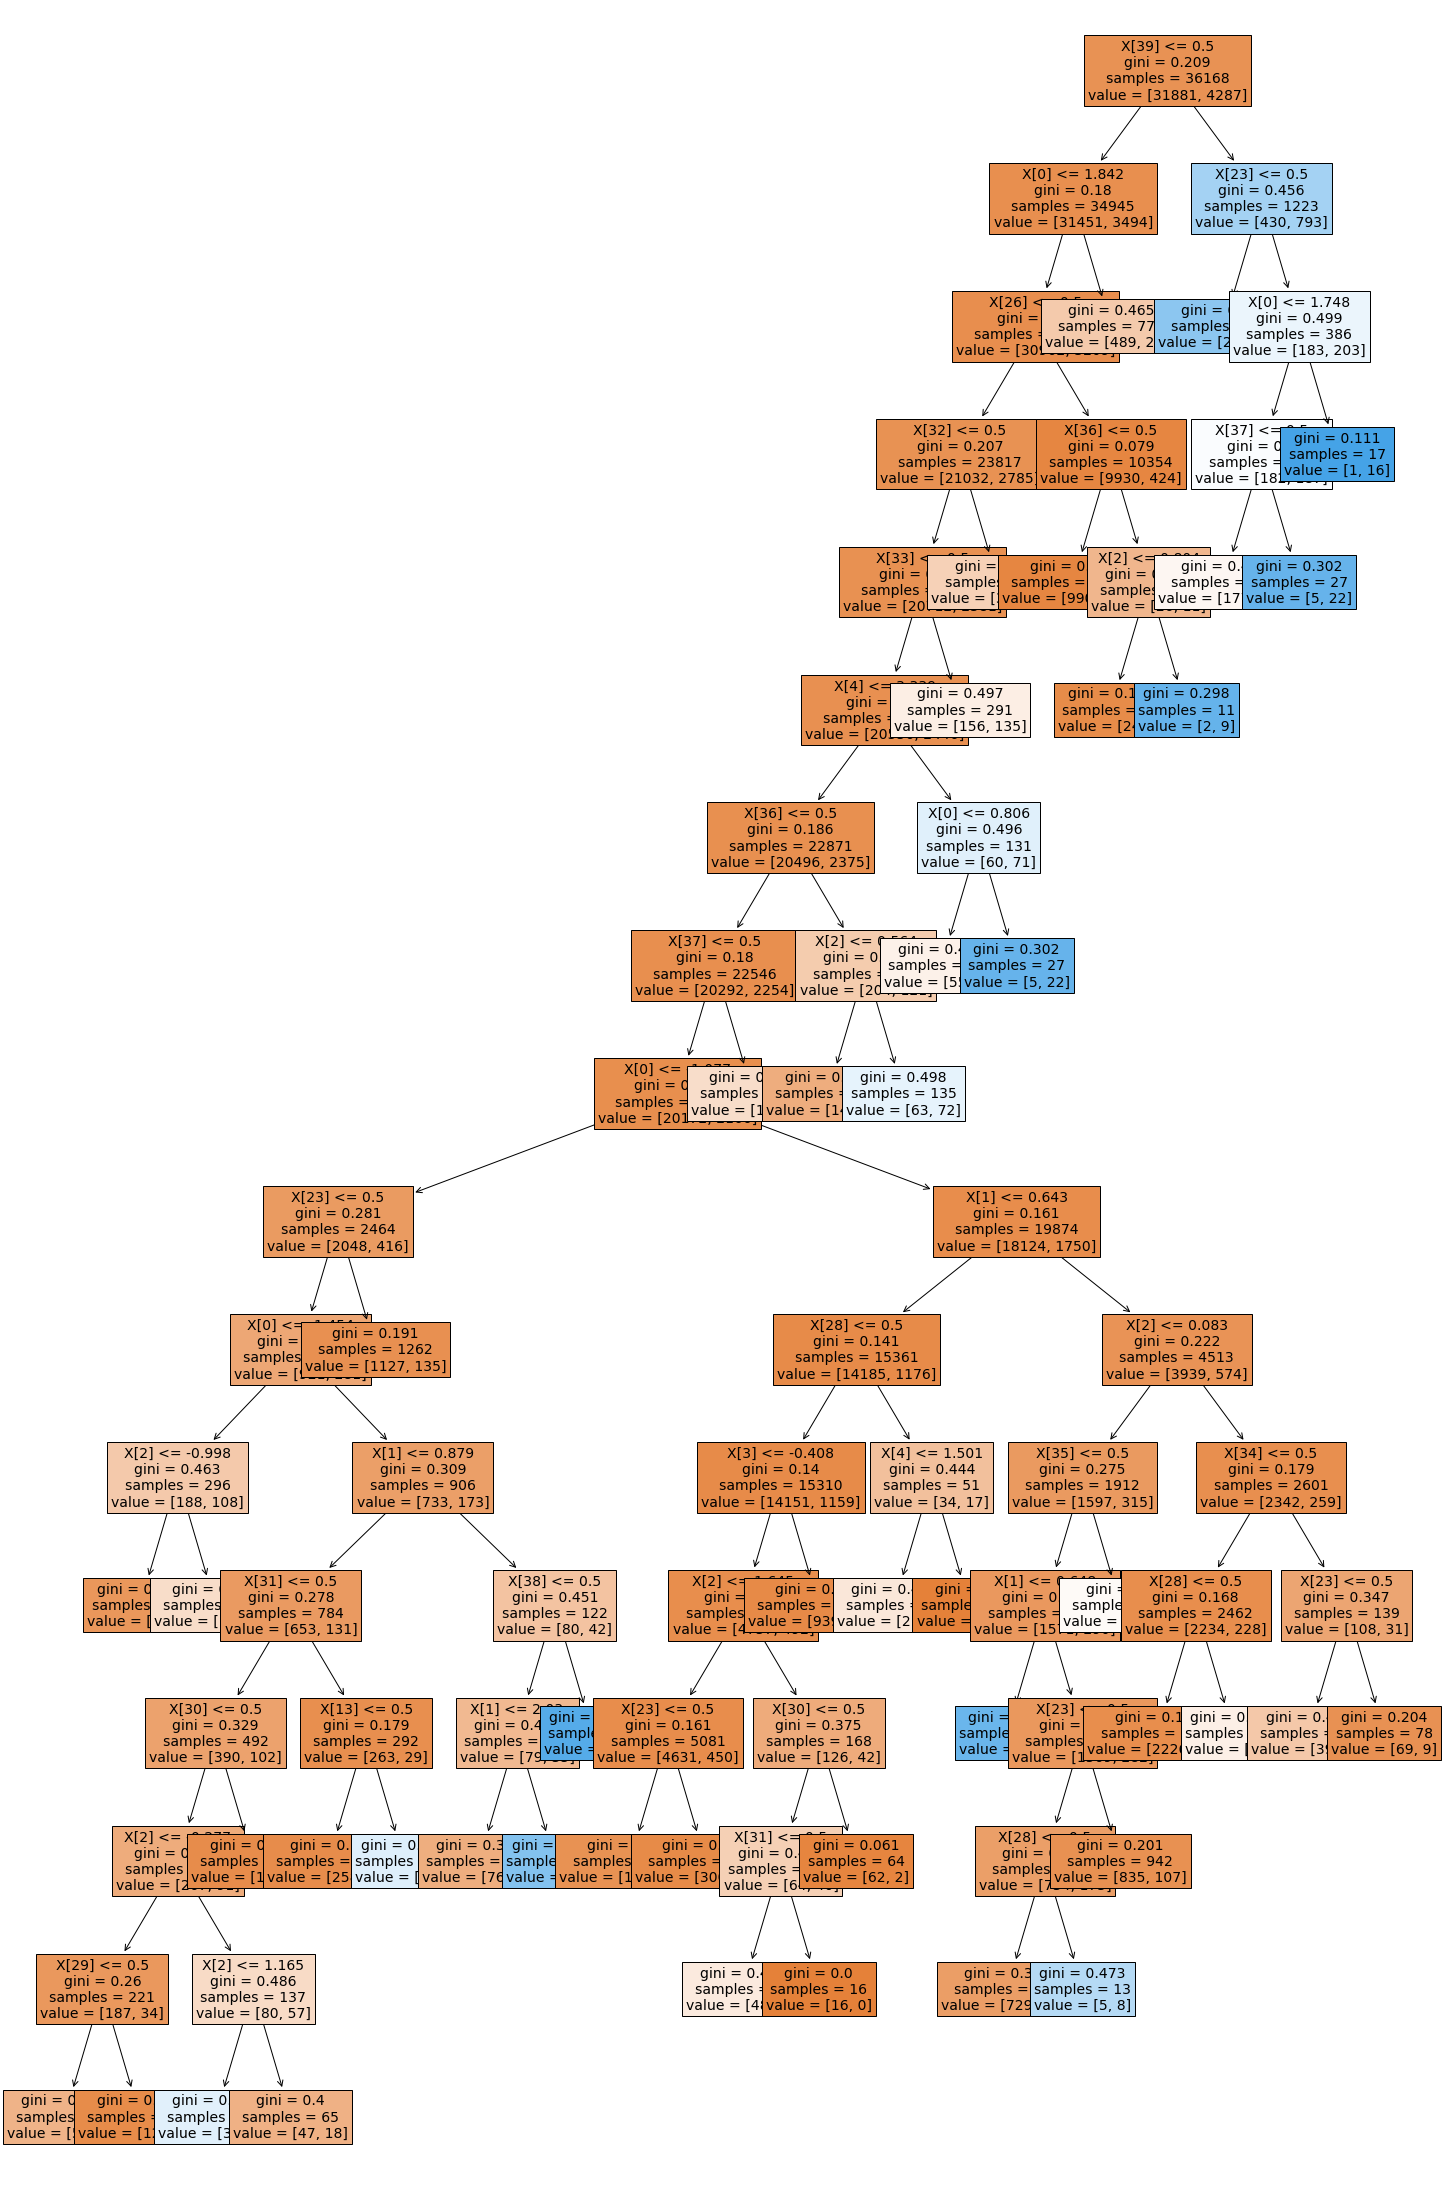

In [105]:
plt.figure(figsize=(25,40))
tree.plot_tree(dt, filled=True, fontsize=14)
plt.plot()

### RandomForestClassifier

In [127]:
params={       'n_estimators':[110,150,200,250],
       'criterion':['gini','entropy'],
    'max_depth':[7,14,21,28,35,45,50],
       'min_samples_split':[2,4,6,8,],
       'max_features':['auto','sqrt','log2',None],
       }
rf=RandomForestClassifier()
rand_rf=RandomizedSearchCV(estimator=rf,param_distributions=params,cv=5,n_jobs=4,verbose=3)
rand_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [7, 14, 21, 28, 35, 45,
                                                      50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [110, 150, 200, 250]},
                   verbose=3)

In [128]:
rand_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 45,
 'criterion': 'entropy'}

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.72      0.22      0.34      1091

    accuracy                           0.90      9043
   macro avg       0.81      0.60      0.64      9043
weighted avg       0.88      0.90      0.87      9043

Roc Auc Score 0.7927302010965888


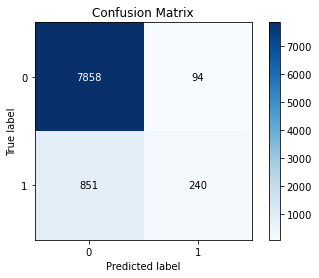

In [78]:
rf=RandomForestClassifier(n_estimators=250,max_features='sqrt',criterion='entropy',min_samples_split=8,
                         max_depth=45)
rf.fit(X_train,y_train)

print(classification_report(y_test, rf.predict(X_test)))

rf_roc_auc = metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,-1])
print('Roc Auc Score',rf_roc_auc)

skplt.metrics.plot_confusion_matrix(y_test,rf.predict(X_test))

In [80]:
fpr_RF,tpr_RF,th=metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,-1])

In [77]:
rf.predict_proba(X_test)[:,-1]

array([0.02, 0.05, 0.08, ..., 0.  , 0.  , 0.01])

### ADABOOSt

### ADA Boost Classifier

#### Tuning the Hyperparameters

In [42]:
Adamodel=AdaBoostClassifier()

In [43]:
#Random_Search
random_params = {'n_estimators':[400,450,600,650],
          'learning_rate':[0.01,0.1,0.15,0.5,1]}
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(Adamodel, param_distributions=random_params, n_jobs=1,cv=5,verbose=3)
#Learning
model1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..............learning_rate=1, n_estimators=450; total time=  15.6s
[CV 2/5] END ..............learning_rate=1, n_estimators=450; total time=  16.7s
[CV 3/5] END ..............learning_rate=1, n_estimators=450; total time=  15.9s
[CV 4/5] END ..............learning_rate=1, n_estimators=450; total time=  15.1s
[CV 5/5] END ..............learning_rate=1, n_estimators=450; total time=  15.6s
[CV 1/5] END ............learning_rate=0.1, n_estimators=450; total time=  16.5s
[CV 2/5] END ............learning_rate=0.1, n_estimators=450; total time=  15.4s
[CV 3/5] END ............learning_rate=0.1, n_estimators=450; total time=  15.3s
[CV 4/5] END ............learning_rate=0.1, n_estimators=450; total time=  15.5s
[CV 5/5] END ............learning_rate=0.1, n_estimators=450; total time=  15.2s
[CV 1/5] END ...........learning_rate=0.15, n_estimators=450; total time=  15.5s
[CV 2/5] END ...........learning_rate=0.15, n_es

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.5,
                                                          1],
                                        'n_estimators': [400, 450, 600, 650]},
                   verbose=3)

###### adaModel`

In [44]:
#Creating adaboost classifier object
Adamodel=AdaBoostClassifier(n_estimators=750,learning_rate=1)

# fit the model using fit() on train data
Adamodel.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=750)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.65      0.20      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



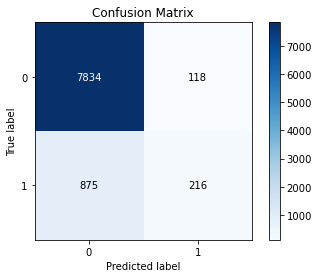

In [45]:
y_pred_ada=Adamodel.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test,y_pred_ada)

print(classification_report(y_test, y_pred_ada))

In [73]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    print(roc_auc_score(y_test,y_pred_prob))
    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    return(fpr,tpr)

0.7750993818087257


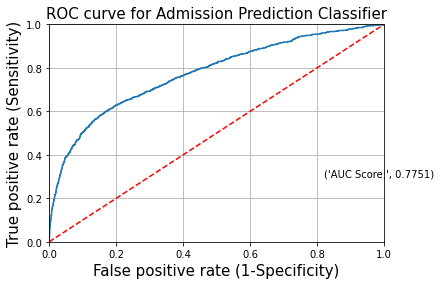

In [74]:
fpr_ada,tpr_ada=plot_roc(Adamodel)

#### XGBOOST

In [134]:
params={  'n_estimators':[450,600,700]     ,'learning_rate':[0.01,0.1,0.2,0.5],'gamma': [0.25,0.5, 1, 1.5, 2],
    'max_depth':[5,6,7,9,10,8],
              'subsample':[0.4,0.6,0.8,1],'colsample_bytree':[0.4,0.6,0.8,1],
       }
xgb_tuning=XGBClassifier(use_label_encoder=False)
rand_rf=RandomizedSearchCV(estimator=xgb_tuning,param_distributions=params,cv=5,n_jobs=4,verbose=3,scoring='roc_auc',
                           random_state=110)
rand_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[21:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                    

In [135]:
rand_rf.best_params_

{'subsample': 1,
 'n_estimators': 700,
 'max_depth': 7,
 'learning_rate': 0.01,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

[21:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.70      0.21      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.60      0.64      9043
weighted avg       0.88      0.89      0.87      9043

0.7980511967312583


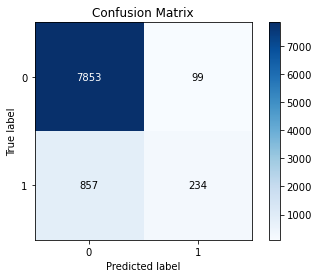

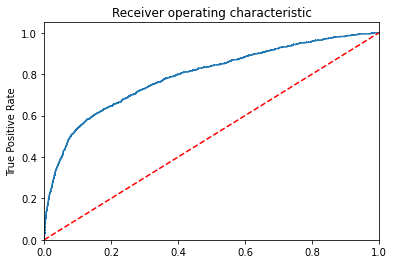

In [75]:
xgb_tuned = XGBClassifier(n_estimators=700,learning_rate=0.01,gamma=.5,objective='binary:logistic',
                    use_label_encoder=False,max_depth=7,colsample_bytree=0.6,subsample=1)
xgb_tuned.fit(X_train,y_train)
xgb_tuned_predict=xgb_tuned.predict(X_test)
xgb_tuned_proba=xgb_tuned.predict_proba(X_test)
print(classification_report(y_test,xgb_tuned_predict))

skplt.metrics.plot_confusion_matrix(y_test,xgb_tuned_predict)
fpr_xgb, tprxgb, thresholds = metrics.roc_curve(y_test, xgb_tuned_proba[:,1])
xgb_tuned_score=metrics.roc_auc_score(y_test, xgb_tuned_proba[:,1])
print(xgb_tuned_score)
plt.figure()
plt.plot(fpr_Xgb, tpr_Xgb, marker=',')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

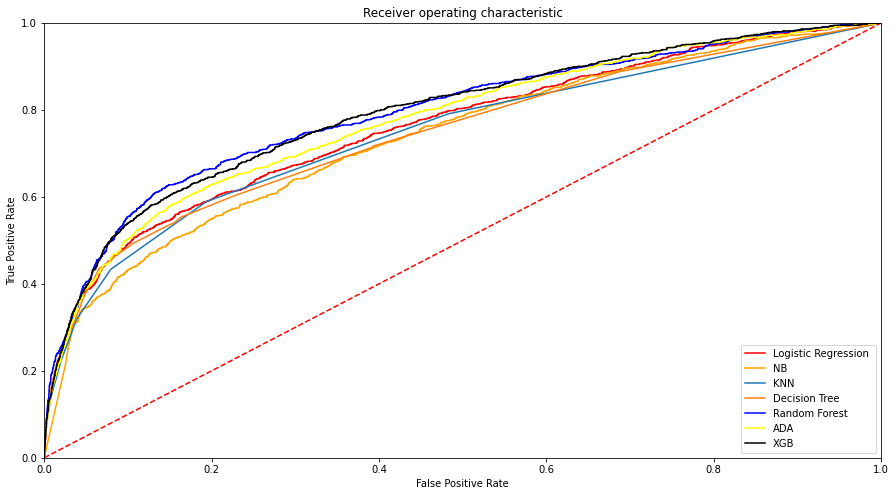

In [95]:
plt.figure(figsize=(15,8))
plt.plot(fpr_logr, tpr_logr, label='Logistic Regression ',color='red' )
plt.plot(fpr_NB, tpr_NB, label='NB ',color='orange' )

plt.plot(fpr_Knn, tpr_Knn, label='KNN' )
plt.plot(fpr_dt, tpr_dt, label='Decision Tree' )
plt.plot(fpr_RF, tpr_RF, label='Random Forest',color='blue' )
plt.plot(fpr_ada, tpr_ada, label='ADA' ,color='yellow')
plt.plot(fpr_Xgb, tpr_Xgb, label='XGB',color='black' )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()